## setup

In [21]:
import pandas as pd
import time
import datetime
import re
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import urllib.request
from PIL import Image

# show all dataframe
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_columns', None)  

before dividing images to folers,<br>
need to manully deletes some unfiltered unrelated images

## import

In [10]:
df_raw = pd.read_csv('tran_file\df_full_selection.csv')
df_raw.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,"1996.61.3a, b",False,False,False,78944,NaN,Costume Institute,1996.0,Suit,Suit,American,NaN,NaN,NaN,NaN,211692014,Design House|Designer,|,Perry Ellis Sportswear Inc.|Perry Ellis,"American, founded 1978|American, 1940–1986",|,Ellis Perry Sportswear Inc.|Ellis Perry,|American,1978 |1940,9999 |1986,|,|,|,ca. 1980,1975,1985,cotton,NaN,"Gift of Roz Gerten Jacobs, 1996",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/78944,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,"1996.61.4a, b",False,False,False,78945,NaN,Costume Institute,1996.0,Suit,Suit,American,NaN,NaN,NaN,NaN,211692014,Design House|Designer,|,Perry Ellis Sportswear Inc.|Perry Ellis,"American, founded 1978|American, 1940–1986",|,Ellis Perry Sportswear Inc.|Ellis Perry,|American,1978 |1940,9999 |1986,|,|,|,fall/winter 1981–82,1981,1982,wool,NaN,"Gift of Roz Gerten Jacobs, 1996",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/78945,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,1996.61.5a–c,False,False,False,78946,NaN,Costume Institute,1996.0,Suit,Suit,American,NaN,NaN,NaN,NaN,211692014,Design House|Designer,|,Perry Ellis Sportswear Inc.|Perry Ellis,"American, founded 1978|American, 1940–1986",|,Ellis Perry Sportswear Inc.|Ellis Perry,|American,1978 |1940,9999 |1986,|,|,|,fall/winter 1981–82,1981,1982,wool,NaN,"Gift of Roz Gerten Jacobs, 1996",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/78946,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,"1996.61.6a, b",False,False,False,78947,NaN,Costume Institute,1996.0,Suit,Suit,American,NaN,NaN,NaN,NaN,211692014,Design House|Designer,|,Perry Ellis Sportswear Inc.|Perry Ellis,"American, founded 1978|American, 1940–1986",|,Ellis Perry Sportswear Inc.|Ellis Perry,|American,1978 |1940,9999 |1986,|,|,|,1981,1981,1981,"linen, wool",NaN,"Gift of Roz Gerten Jacobs, 1996",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/78947,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,"1996.61.8a, b",False,False,False,78949,NaN,Costume Institute,1996.0,Suit,Suit,Italian,NaN,NaN,NaN,NaN,25847234812015,Design House|Department Store|Designer,| |,Giorgio Armani|I. Magnin & Co.|Giorgio Armani,"Italian, founded 1974|American, founded 1876|Italian, born 1934",| |,Armani|Magnin I. & Co.|Armani Giorgio,Italian|American|Italian,1974 |1876 |1934-07-11,9999 | |9999,||,(not assigned)||http://vocab.getty.edu/page/ulan/500016277,https://www.wikidata.org/wiki/Q157054||https://www.wikidata.org/wiki/Q157054,ca. 1982,1977,1987,wool,NaN,"Gift of Roz Gerten Jacobs, 1996",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/78949,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [13]:
col_sel = ['Object Number','Object ID', 'Is Public Domain', 'Department','Object Name', 
            'Title', 'Culture', 'Link Resource']

df = df_raw[col_sel]

## cleanup

In [16]:
# only take the ones in public domain
# because the first batch is public domain images only
df = df[df['Is Public Domain']==True]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3018 entries, 13 to 14289
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Object Number     3018 non-null   object 
 1   Object ID         3018 non-null   int64  
 2   Is Public Domain  3018 non-null   bool   
 3   Department        3018 non-null   object 
 4   Object Name       3018 non-null   object 
 5   Title             2625 non-null   object 
 6   Culture           2905 non-null   object 
 7   Period            390 non-null    object 
 8   Dynasty           0 non-null      float64
 9   Reign             0 non-null      float64
 10  Classification    585 non-null    object 
 11  Link Resource     3018 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 285.9+ KB


## process image

In [19]:
im = Image.open(r"test\70652.jpg")
 
im.show()

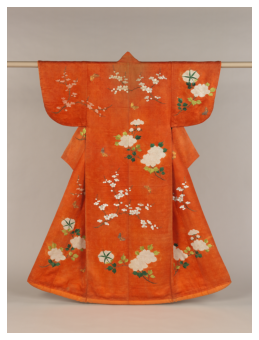

In [101]:
raw_img = mpimg.imread("test/74364.jpg")
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(raw_img)
plt.show()

In [102]:
raw_img.shape

(2000, 1501, 3)

In [103]:
w = raw_img.shape[1]
h = raw_img.shape[0]
bg_side_len = (max(w,h), max(w,h))
dist = (h-w)/2

In [104]:
raw_img = Image.open('test/74364.jpg')

In [105]:
# initiate a black background
bg = Image.new('RGB', (bg_side_len), color = 'black')

img2 = raw_img.transpose(Image.FLIP_LEFT_RIGHT)

bg.paste(raw_img, (int(dist),0))
bg.paste(img2, (int(dist)+w,0))
bg.paste(img2, (int(dist)-w,0))



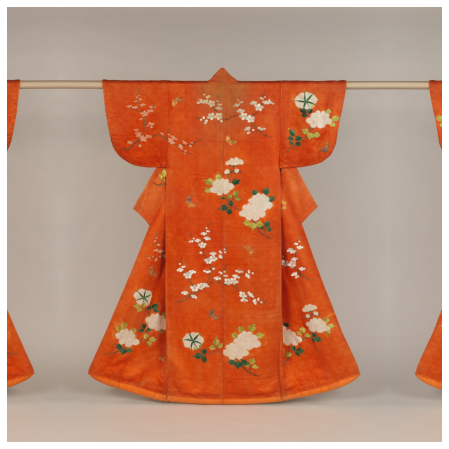

In [106]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(bg)
plt.show()